In [1]:
import tensorflow as tf

2024-05-03 19:50:10.226439: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 19:50:13.931726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load li

In [44]:
!gsutil -m cp -r oxoford_dataset_original gs://plant_buddy2

Copying file://oxoford_dataset_original/test_set_original/dataset_spec.pb [Content-Type=application/octet-stream]...
Copying file://oxoford_dataset_original/test_set_original/snapshot.metadata [Content-Type=application/octet-stream]...
Copying file://oxoford_dataset_original/test_set_original/4733451936394834620/00000000.shard/00000000.snapshot [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composi

In [2]:
saved_model = tf.keras.models.load_model('gs://plant-buddy-bucket/model_oxford/model_trained_valid12_4', compile=False)

saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [3]:
base_model = tf.keras.applications.EfficientNetB7(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

print("Number of layers in the base model: ", len(base_model.layers))

2024-03-19 11:12:32.561387: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-19 11:12:32.592499: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-19 11:12:32.592589: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0d94207cbf33): /proc/driver/nvidia/version does not exist
2024-03-19 11:12:32.618468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in 

258076736/258076736 [==============================] - 6s 0us/step
Number of layers in the base model:  814


In [4]:
print("weights:", len(saved_model.weights))
print("non-trainable weights:", len(saved_model.non_trainable_weights))

weights: 264
non-trainable weights: 260


In [6]:
len(saved_model.get_layer(name='keras_layer').non_trainable_weights)

260

In [1]:
import tensorflow_hub as hub
import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

2024-05-04 10:37:34.635953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-04 10:37:51.276107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load li

In [14]:
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info

test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))

num_classes = dataset_info.features['label'].num_classes
print('Total Number of Classes: {}'.format(num_classes))

# IMAGE_RES = 224
# BATCH_SIZE = 32

# def format_image(image, label):
#   image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
#   return image, label

# training_set = training_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
# validation_set = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
# test_set = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

# num_training_batches = tf.data.experimental.cardinality(training_set).numpy()
# num_validation_batches = tf.data.experimental.cardinality(validation_set).numpy()
# num_test_batches = tf.data.experimental.cardinality(test_set).numpy()

# print("Number of batches in the training set:", num_training_batches)
# print("Number of batches in the validation set:", num_validation_batches)
# print("Number of batches in the test set:", num_test_batches)

# %%

desired_training_size = 6552
desired_validation_size = 819
desired_test_size = 818

test_set = test_set.shuffle(buffer_size=6149)
remaining_test_instances = test_set.skip(5532).take(617)
instances_for_training = test_set.take(5532)

training_set = training_set.concatenate(instances_for_training)
training_set = training_set.shuffle(buffer_size=desired_training_size)

validation_set = validation_set.shuffle(buffer_size=1020)
instances_for_test = validation_set.skip(819).take(201)

validation_set = validation_set.take(819)

test_set = remaining_test_instances.concatenate(instances_for_test)
test_set = test_set.shuffle(818)

num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))

num_classes = dataset_info.features['label'].num_classes
print('Total Number of Classes: {}'.format(num_classes))
# test_set.save('oxford_dataset_above/test_set_above')
# training_set.save('oxford_dataset_above/training_set_above')
# validation_set.save('oxford_dataset_above/validation_set_above')

2024-05-03 20:12:27.446546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2024-05-03 20:12:27.447089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-05-03 20:12:27.993023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{n

Total Number of Training Images: 1020
Total Number of Validation Images: 1020
Total Number of Test Images: 6149 

Total Number of Classes: 102


2024-05-03 20:12:30.895792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2024-05-03 20:12:30.896834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_24' with dtype int64 and shape [2]
	 [[{{node Placeholder/_24}}]]
2024-05-03 20:12:35.902038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{no

Total Number of Training Images: 6552
Total Number of Validation Images: 819
Total Number of Test Images: 818 

Total Number of Classes: 102


In [32]:
training_set_above.save('oxford_dataset_above/training_set_above')
validation_set_above.save('oxford_dataset_above/validation_set_above')
test_set_above.save('oxford_dataset_above/test_set_above')

In [45]:
# training_set_original=tf.data.Dataset.load('oxoford_dataset_original/training_set_original')
# validation_set_original=tf.data.Dataset.load('oxoford_dataset_original/validation_set_original')
# test_set_original=tf.data.Dataset.load('oxoford_dataset_original/test_set_original')

training_set_above=tf.data.Dataset.load('oxoford_dataset_original/training_set_original')
validation_set_above=tf.data.Dataset.load('oxoford_dataset_original/validation_set_original')
test_set_above=tf.data.Dataset.load('oxoford_dataset_original/test_set_original')

In [46]:
# training_set_above=tf.data.Dataset.load('oxford_dataset_above/training_set_above')
# validation_set_above=tf.data.Dataset.load('oxford_dataset_above/validation_set_above')
# test_set_above=tf.data.Dataset.load('oxford_dataset_above/test_set_above')

training_class_counts = {}
validation_class_counts = {}
test_class_counts = {}

for images, labels in training_set_above:
    for label in labels.numpy():
        label = label.item()
        if label in training_class_counts:
            training_class_counts[label] += 1
        else:
            training_class_counts[label] = 1

for images, labels in validation_set_above:
    for label in labels.numpy():
        label = label.item()  
        if label in validation_class_counts:
            validation_class_counts[label] += 1
        else:
            validation_class_counts[label] = 1


for images, labels in test_set_above:
    for label in labels.numpy():
        label = label.item() 
        if label in test_class_counts:
            test_class_counts[label] += 1
        else:
            test_class_counts[label] = 1

In [18]:
for i, (images, labels) in enumerate(training_set_above):
    if i >= 5: 
        break
    print('Training batch', i+1, '- Images shape:', images.shape, '- Labels shape:', labels.shape)
    if images.shape[0] == 0 or labels.shape[0] == 0:
        print('Warning: Empty batch')

for i, (images, labels) in enumerate(validation_set_above):
    if i >= 5: 
        break
    print('Validation batch', i+1, '- Images shape:', images.shape, '- Labels shape:', labels.shape)
    if images.shape[0] == 0 or labels.shape[0] == 0:
        print('Warning: Empty batch')

for i, (images, labels) in enumerate(test_set_above):
    if i >= 5: 
        break
    print('Test batch', i+1, '- Images shape:', images.shape, '- Labels shape:', labels.shape)
    if images.shape[0] == 0 or labels.shape[0] == 0:
        print('Warning: Empty batch')

In [35]:
training_labels = set(training_class_counts.keys())
validation_labels = set(validation_class_counts.keys())
test_labels = set(test_class_counts.keys())

print('Number of unique labels in training set:', len(training_labels))
print('Number of unique labels in validation set:', len(validation_labels))
print('Number of unique labels in test set:', len(test_labels))

if training_labels == validation_labels == test_labels:
    print('All datasets have the same unique labels.')
else:
    print('Datasets have different unique labels.')

Number of unique labels in training set: 36
Number of unique labels in validation set: 36
Number of unique labels in test set: 36
All datasets have the same unique labels.


In [12]:
num_training_batches = tf.data.experimental.cardinality(training_set).numpy()
num_validation_batches = tf.data.experimental.cardinality(validation_set).numpy()
num_test_batches = tf.data.experimental.cardinality(test_set).numpy()

print("Number of batches in the training set:", num_training_batches)
print("Number of batches in the validation set:", num_validation_batches)
print("Number of batches in the test set:", num_test_batches)

Number of batches in the training set: 225
Number of batches in the validation set: 32
Number of batches in the test set: 0


In [36]:
print("Training set labels:")
for label, count in training_class_counts.items():
    print("{}".format(label))

print("Training set:")
for label, count in training_class_counts.items():
    print("{}".format(count))

print("\nValidation set labels:")
for label, count in validation_class_counts.items():
    print("{}".format(label))

print("\nValidation set:")
for label, count in validation_class_counts.items():
    print("{}".format(count))

print("\nTest set labels:")
for label, count in test_class_counts.items():
    print("{}".format(label))

print("\nTest set:")
for label, count in test_class_counts.items():
    print("{}".format(count))

Training set labels:
76
71
57
93
50
7
87
45
72
43
88
82
42
73
59
51
22
75
77
81
94
80
64
49
83
79
55
11
52
36
40
95
74
17
29
10
Training set:
211
76
85
136
217
63
124
156
164
75
148
115
95
134
87
59
70
88
108
88
101
128
75
67
68
87
86
71
77
87
96
70
96
60
59
69

Validation set labels:
94
29
88
64
71
93
43
79
59
17
95
51
57
80
10
82
83
49
7
11
55
40
36
72
52
22
73
75
45
77
81
42
50
74
87
76

Validation set:
12
11
15
14
12
15
12
12
17
15
13
10
11
16
13
10
13
11
12
13
19
19
9
12
8
14
11
13
18
13
13
8
23
17
14
22

Test set labels:
88
42
79
45
74
75
51
95
82
57
17
22
11
49
77
87
72
36
80
71
55
76
93
43
29
10
73
50
81
7
40
94
83
52
64
59

Test set:
23
14
13
21
9
8
11
14
17
15
7
14
12
8
23
9
21
10
12
7
11
26
20
15
8
7
16
18
8
8
11
11
7
8
7
8


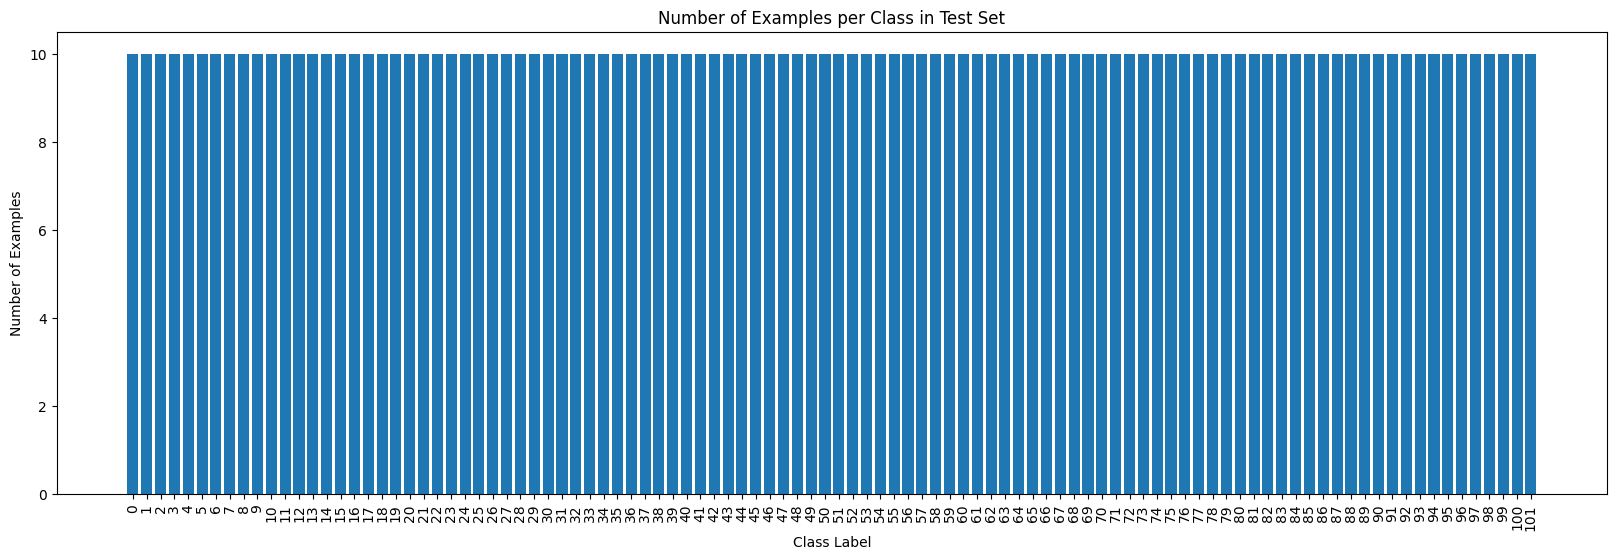

In [49]:
sorted_classes = sorted(validation_class_counts.keys())

plt.figure(figsize=(20, 6))
plt.bar(range(len(sorted_classes)), [training_class_counts[label] for label in sorted_classes], align='center')
plt.xticks(range(len(sorted_classes)), [str(label) for label in sorted_classes], rotation='vertical')
plt.ylabel('Number of Examples')
plt.xlabel('Class Label')
plt.title('Number of Examples per Class in Test Set')
plt.show()

In [27]:
total_training_examples = sum(training_class_counts.values())

average_examples_per_class = total_training_examples / len(training_class_counts)

print("Average number of examples per class in the training set:", average_examples_per_class)


Average number of examples per class in the training set: 99.88888888888889


In [29]:
 len(validation_class_counts)

36

In [27]:
above_average_count = 0
under_average_count = 0

for count in training_class_counts.values():
    if count >= average_examples_per_class:
        above_average_count += 1
    elif count < average_examples_per_class:
        under_average_count += 1

print("Number of classes with examples above average:", above_average_count)
print("Number of classes with examples under average:", under_average_count)

Number of classes with examples above average: 36
Number of classes with examples under average: 66


In [28]:
classes_above_average = [label for label, count in training_class_counts.items() if count > average_examples_per_class]

above_average_training_set = training_set.filter(lambda images, labels: tf.reduce_any(tf.equal(labels, classes_above_average)))
above_average_validation_set = validation_set.filter(lambda images, labels: tf.reduce_any(tf.equal(labels, classes_above_average)))
above_average_test_set = test_set.filter(lambda images, labels: tf.reduce_any(tf.equal(labels, classes_above_average)))

In [30]:
examples_to_move = above_average_training_set.take(200)
above_average_validation_set = above_average_validation_set.concatenate(examples_to_move)
above_average_training_set = above_average_training_set.skip(200)

In [47]:
# num_training_examples = 0
# num_validation_examples = 0
# num_test_examples = 0

# for example in above_average_training_set:
#   num_training_examples += 1

# for example in above_average_validation_set:
#   num_validation_examples += 1

# for example in above_average_test_set:
#   num_test_examples += 1

# print('Total Number of Training Images: {}'.format(num_training_examples))
# print('Total Number of Validation Images: {}'.format(num_validation_examples))
# print('Total Number of Test Images: {} \n'.format(num_test_examples))

num_training_examples = tf.data.experimental.cardinality(training_set_above).numpy()
num_validation_examples = tf.data.experimental.cardinality(validation_set_above).numpy()
num_test_examples = tf.data.experimental.cardinality(test_set_above).numpy()

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {}'.format(num_test_examples))

# num_training_examples = len(list(above_average_training_set))
# num_validation_examples = len(list(above_average_validation_set))
# num_test_examples = len(list(above_average_test_set))

# print('Total Number of Training Images: {}'.format(num_training_examples))
# print('Total Number of Validation Images: {}'.format(num_validation_examples))
# print('Total Number of Test Images: {}'.format(num_test_examples))

Total Number of Training Images: 32
Total Number of Validation Images: 32
Total Number of Test Images: 193


In [22]:
IMAGE_RES = 224
BATCH_SIZE = 32

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

training_set_above = training_set_above.map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_set_above = validation_set_above.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_set_above = test_set_above.map(format_image).batch(BATCH_SIZE).prefetch(1)

num_training_batches = tf.data.experimental.cardinality(training_set_above).numpy()
num_validation_batches = tf.data.experimental.cardinality(validation_set_above).numpy()
num_test_batches = tf.data.experimental.cardinality(test_set_above).numpy()

print("Number of batches in the training set:", num_training_batches)
print("Number of batches in the validation set:", num_validation_batches)
print("Number of batches in the test set:", num_test_batches)

Number of batches in the training set: 113
Number of batches in the validation set: 16
Number of batches in the test set: 15


In [40]:
dataset, dataset_info = tfds.load('tensorflow_datasets/oxford_flowers102/2.1.1', with_info=True, as_supervised=True)
dataset_info

test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))
num_classes = dataset_info.features['label'].num_classes
print('Total Number of Classes: {}'.format(num_classes))

desired_training_size = 6552
desired_validation_size = 819
desired_test_size = 818

test_set = test_set.shuffle(buffer_size=6149)
remaining_test_instances = test_set.skip(5532).take(617)
instances_for_training = test_set.take(5532)

training_set = training_set.concatenate(instances_for_training)
training_set = training_set.shuffle(buffer_size=desired_training_size)

validation_set = validation_set.shuffle(buffer_size=1020)
instances_for_test = validation_set.skip(819).take(201)

validation_set = validation_set.take(819)

test_set = remaining_test_instances.concatenate(instances_for_test)
test_set = test_set.shuffle(818)

IMAGE_RES = 224
BATCH_SIZE = 32

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

training_set = training_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_set = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_set = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

num_training_batches = tf.data.experimental.cardinality(training_set).numpy()
num_validation_batches = tf.data.experimental.cardinality(validation_set).numpy()
num_test_batches = tf.data.experimental.cardinality(test_set).numpy()

print("Number of batches in the training set:", num_training_batches)
print("Number of batches in the validation set:", num_validation_batches)
print("Number of batches in the test set:", num_test_batches)

ValueError: Parsing builder name string tensorflow_datasets/oxford_flowers102/2.1.1 failed.
The builder name string must be of the following format:
  dataset_name[/config_name][:version][/kwargs]

  Where:

    * dataset_name and config_name are string following python variable naming.
    * version is of the form x.y.z where {x,y,z} can be any digit or *.
    * kwargs is a comma list separated of arguments and values to pass to
      builder.

  Examples:
    my_dataset
    my_dataset:1.2.*
    my_dataset/config1
    my_dataset/config1:1.*.*
    my_dataset/config1/arg1=val1,arg2=val2
    my_dataset/config1:1.2.3/right=True,foo=bar,rate=1.2


In [11]:
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info

test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))
num_classes = dataset_info.features['label'].num_classes
print('Total Number of Classes: {}'.format(num_classes))


desired_training_size = 6552
desired_validation_size = 819
desired_test_size = 818

test_set = test_set.shuffle(buffer_size=6149)
remaining_test_instances = test_set.skip(5532).take(617)
instances_for_training = test_set.take(5532)

training_set = training_set.concatenate(instances_for_training)
training_set = training_set.shuffle(buffer_size=desired_training_size)

validation_set = validation_set.shuffle(buffer_size=1020)
instances_for_test = validation_set.skip(819).take(201)

validation_set = validation_set.take(819)

test_set = remaining_test_instances.concatenate(instances_for_test)
test_set = test_set.shuffle(818)

IMAGE_RES = 224
BATCH_SIZE = 32

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

training_set = training_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_set = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_set = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

num_training_batches = tf.data.experimental.cardinality(training_set).numpy()
num_validation_batches = tf.data.experimental.cardinality(validation_set).numpy()
num_test_batches = tf.data.experimental.cardinality(test_set).numpy()

print("Number of batches in the training set:", num_training_batches)
print("Number of batches in the validation set:", num_validation_batches)
print("Number of batches in the test set:", num_test_batches)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])


from tensorflow.keras import layers
# URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# feature_extractor = hub.KerasLayer(URL,
#                                    input_shape=(IMAGE_RES, IMAGE_RES, 3))

base_model = tf.keras.applications.MobileNetV2(input_shape=(IMAGE_RES, IMAGE_RES, 3),
                                               include_top=False,
                                               weights='imagenet')


for image_batch, label_batch in training_set.take(1):
    pass
image_batch.shape

feature_batch = base_model(image_batch)
print(feature_batch.shape)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(102, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

dropout_rate = 0.2

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = layers.Dropout(dropout_rate)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# %%


import pandas as pd

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.summary()

Total Number of Training Images: 1020
Total Number of Validation Images: 1020
Total Number of Test Images: 6149 

Total Number of Classes: 102
Number of batches in the training set: 205
Number of batches in the validation set: 26
Number of batches in the test set: 26
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_13 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dense_14 (Dense)            (None, 7, 7, 150)         192150    
                                                       

In [13]:
for image_batch, label_batch in training_set.take(1):
    pass
image_batch.shape

feature_batch = base_model(image_batch)
print(feature_batch.shape)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(102, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

TensorShape([32, 224, 224, 3])

In [13]:
saved_model.get_layer(name='mobilenetv2_1.00_160').trainable = True

In [7]:
base_model = saved_model.get_layer(name='keras_layer')

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 130

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

AttributeError: 'KerasLayer' object has no attribute 'layers'

In [27]:
if base_model.layers[100].trainable != True:
     raise ValueError("Base model is not trainable")

In [15]:
saved_model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         Y          
                                                                            
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         Y          
 )                                                                          
                                                                            
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         Y          
 a)                                                                         
                                                                            
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   Y          
 ional)                                                                     
                                                             

In [12]:
flower_model.get_layer(name='dense').output_shape != (None, 4271)

False

In [1]:
import pandas as pd

In [2]:
history = pd.read_csv('gs://plant-buddy-bucket/histories/history2.csv')

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']

training_loss = history['loss']
validation_loss = history['val_loss']

print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)

Training Accuracy: 0     0.719209
1     0.722566
2     0.725563
3     0.727783
4     0.730405
5     0.733880
6     0.735069
7     0.739504
8     0.740159
9     0.742711
10    0.745507
11    0.747801
12    0.748406
13    0.751548
14    0.751702
Name: accuracy, dtype: float64
Validation Accuracy: 0     0.154891
1     0.155535
2     0.155242
3     0.155418
4     0.155125
5     0.155271
6     0.155535
7     0.155945
8     0.156266
9     0.155213
10    0.155301
11    0.155154
12    0.155066
13    0.155388
14    0.155798
Name: val_accuracy, dtype: float64
Training Loss: 0     1.191868
1     1.162548
2     1.137489
3     1.123207
4     1.110076
5     1.087077
6     1.081575
7     1.055641
8     1.046512
9     1.031640
10    1.016346
11    1.004816
12    0.995385
13    0.982793
14    0.973492
Name: loss, dtype: float64
Validation Loss: 0     10.654334
1     10.644898
2     10.642955
3     10.637609
4     10.627039
5     10.622716
6     10.626637
7     10.627917
8     10.634846
9     10.643703


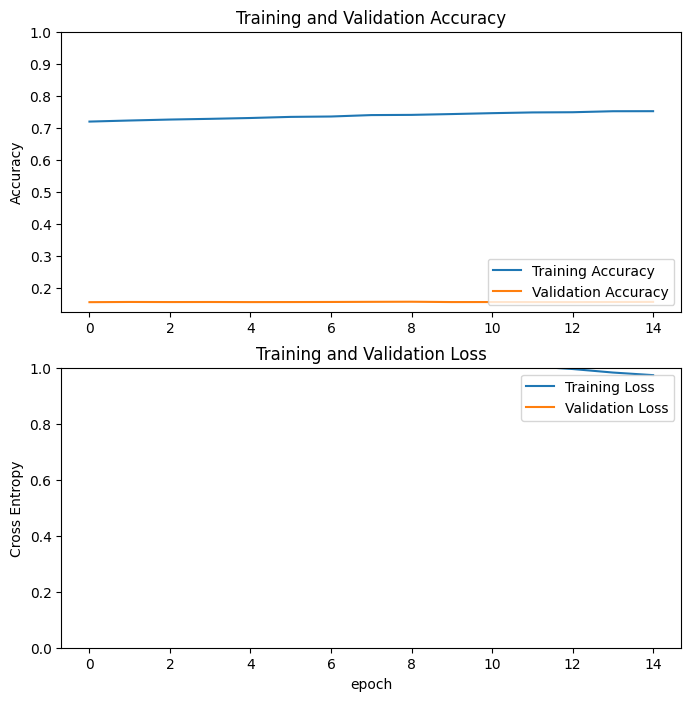

In [5]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [4]:
import matplotlib.pyplot as plt

In [6]:
history.epoch

AttributeError: 'DataFrame' object has no attribute 'epoch'

In [7]:
history['epoch']

KeyError: 'epoch'